In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
from sklearn import linear_model
from scipy.stats import multivariate_normal
from datetime import date


sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

<h1>Часть 1. О теореме Байеса</h1>

<h3>Задание 1</h3>

Интерес в данной задаче представляет вероятность виновности подсудимого при условии, что у него редкая группа крови, то есть прокурору нужно было посчитать вероятность $\mathbb{P}(\text{подсудимый виновен|у подсудимого редкая группа крови})$, которая вычисляется по формуле:

$\mathbb{P}(\text{подсудимый виновен|у подсудимого редкая группа крови}) = \frac{\mathbb{P}(\text{у подсудимого редкая группа крови|подсудимый виновен})*\mathbb{P}(\text{подсудимый виновен})}{\mathbb{P}(\text{у подсудимого редкая группа крови})}$

Однако прокурор, видимо, не знал этой формулы и оценил искомую вероятность по "формуле", которая не несет никакого содержательного смысла: $\mathbb{P}(\text{подсудимый виновен|у подсудимого редкая группа крови}) = 1 - \mathbb{P}(\text{у подсудимого редкая группа крови|подсудимый не виновен}) = 1 - 0.01 = 0.99$

Для вычисления правильной вероятности необходимо знать безусловную вероятность виновности и вероятность того, что у подсудимого редкая группа крови при условии его виновности.

<h3>Задание 2</h3>

Адвокату нужно было оценить ту же самую вероятность, что и в первом задании(или же вероятность НЕвиновности подсудимого при условии, что у него редкая группа крови).

Адвокат же оценил вероятность того, что случайно взятый человек с редкой группой крови окажется убийцей по данному делу. Если бы факт редкой группы крови был единственным аргументом обвинения и подсудимый был выбран случайно из всех людей с редкой группой крови, то адвокат был бы абослютно прав в оценке вероятности его виновности. Однако наверняка подсудимый был задержан не рандомным способом, а еще по каким-то причинам, которые не фигурируют в тексте задания. Из-за них вероятность того, что именно подсудимый совершил убийство будет не такой. Если посмотреть на формулу в пункте 1, то эти причины будут влиять на второй множитель в числителе дроби.

<h3>Задание 3</h3>

Обозначим за $t$ результат теста, а за $d$ - наличие болезни($t = 1$ => тест показал, что человек болен; $d = 1$ => человек действительно болен). 

Используя теорему Байеса, выпишем в явном виде вероятностей того, что человек действительно болен при условии положительного и отрицательного теста:

$\mathbb{P}(d = 1 | t = 1) = \frac{\mathbb{P}(t = 1 | d = 1)\mathbb{P}(d = 1)}{\mathbb{P}(t = 1 | d = 1)\mathbb{P}(d = 1) + \mathbb{P}(t = 1 | d = 0)\mathbb{P}(d = 0)}$

$\mathbb{P}(d = 1 | t = 0) = \frac{\mathbb{P}(t = 0 | d = 1)\mathbb{P}(d = 1)}{\mathbb{P}(t = 0 | d = 1)\mathbb{P}(d = 1) + \mathbb{P}(t = 0 | d = 0)\mathbb{P}(d = 0)}$

Обозначим за $fn = \mathbb{P}(t = 0 | d = 1)$ и $fp = \mathbb{P}(t = 1 | d = 0)$ и перепишем еще раз формулы в новых обозначения, подставив в них значения величин, на которые мы не можем влиять:

$\mathbb{P}(d = 1 | t = 1) = \frac{(1 - fn) * 0.01}{(1 - fn)*0.01 + fp * 0.99}$

$\mathbb{P}(d = 1 | t = 0) = \frac{fn * 0.01}{fn*0.01 + (1 - fp) * 0.99}$

In [2]:
def sick_with_positive_test(fn, fp):
    return (1 - fn) * 0.01 / ((1 - fn) * 0.01 + fp * 0.99)
def sick_with_negative_test(fn, fp):
    return fn * 0.01 / (fn * 0.01 + (1 - fp) * 0.99)

Для начала посмотрим на апостериорные вероятности после получения положительного результата теста.

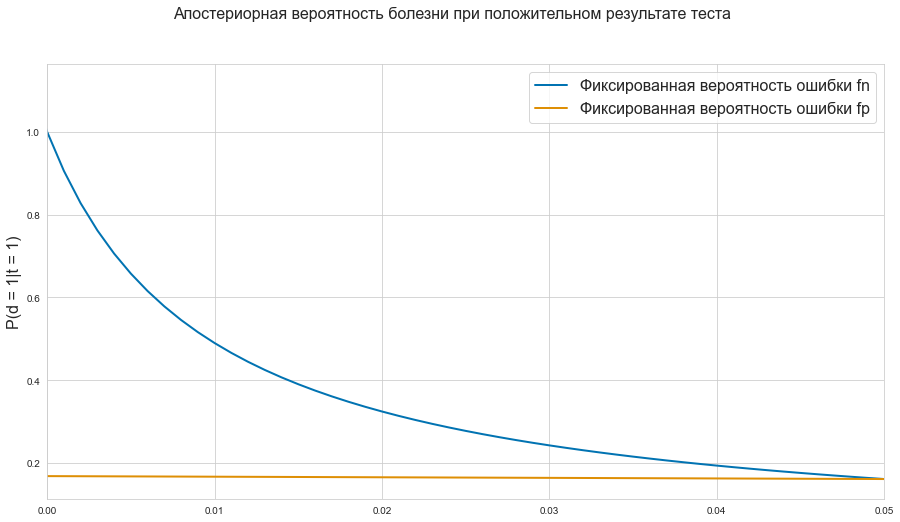

In [3]:
xs = np.arange(-0.001, 0.051, 0.001)

ys_pos_fixed_fn = [sick_with_positive_test(0.05, x) for x in xs]
ys_pos_fixed_fp = [sick_with_positive_test(x, 0.05) for x in xs]

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_pos_fixed_fn, linewidth=2, label="Фиксированная вероятность ошибки fn")
ax.plot(xs, ys_pos_fixed_fp, linewidth=2, label="Фиксированная вероятность ошибки fp")
ax.set_xlim((-.0, 0.05))
ax.set_ylabel('P(d = 1|t = 1)', fontsize=legend_fontsize)
fig.suptitle('Апостериорная вероятность болезни при положительном результате теста', fontsize=legend_fontsize)
ax.legend(loc="upper right", fontsize=legend_fontsize)
plt.show()

In [4]:
ys_pos_fixed_fp[0], ys_pos_fixed_fp[25], ys_pos_fixed_fp[50]

(0.16820702402957485, 0.16469794127573403, 0.16115912557193696)

Аналогично посмотрим на апостериорные вероятности после получения отрицательного результата теста.

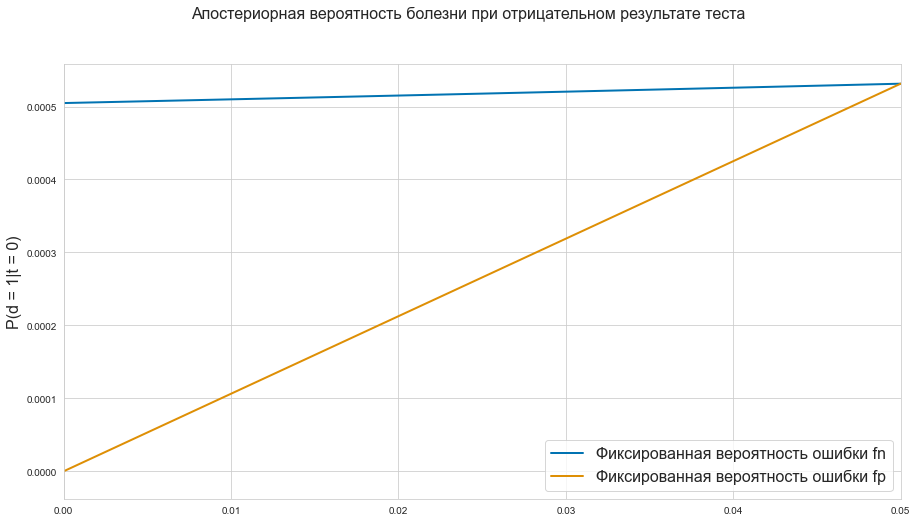

In [5]:
xs = np.arange(-0.001, 0.051, 0.001)

ys_neg_fixed_fn = [sick_with_negative_test(0.05, x) for x in xs]
ys_neg_fixed_fp = [sick_with_negative_test(x, 0.05) for x in xs]

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_neg_fixed_fn, linewidth=2, label="Фиксированная вероятность ошибки fn")
ax.plot(xs, ys_neg_fixed_fp, linewidth=2, label="Фиксированная вероятность ошибки fp")
ax.set_xlim((-.0, 0.05))
ax.set_ylabel('P(d = 1|t = 0)', fontsize=legend_fontsize)
fig.suptitle('Апостериорная вероятность болезни при отрицательном результате теста', fontsize=legend_fontsize)
ax.legend(loc="lower right", fontsize=legend_fontsize)
plt.show()

In [6]:
ys_neg_fixed_fn[0], ys_neg_fixed_fn[25], ys_neg_fixed_fn[50]

(0.0005042915208423686, 0.0005172021432856818, 0.000530791197358783)

Как можно заметить, при уменьшении вероятности положительного результата теста у здорового человека($fp$), мы с большей уверенностью можем говорить о том, что человек действительно болен при положительном результате теста, а также немного уменьшается вероятность того, что человек болен при отрицательном тесте.

Если же уменьшать вероятность отрицательного теста у больного человека($fn$), то незначительно будет увеличиваться вероятность того, что человек действительно болен при положительном результате, однако при отрицательном результате вероятность, что человек действительно здоров, будет выше.

Что касается рекомендаций врачам, то нужно понимать цель теста. Если мы хотим выявить всех заболевших и от курса лечения здоровый человек не пострадает, то лучше уменьшать вероятность отрицательного теста у больного. Однако если болезнь не очень опасна для человечества, но последствия от лечения могут нанести серьезный вред организму здорового человека, лучше снижать вероятность положительного результата теста у здорового человека. 

<h1>Часть 2. О линейной регрессии</h1>

<h5>Задание 1</h5>

Импотируем необходимый dataset.

In [7]:
data_path = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(data_path)
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [8]:
data_rus = data[data['location'] == 'Russia']
data_rus = data_rus[data_rus['date'] >= "2020-03-03"]
data_rus.reset_index(inplace=True)
data_rus = data_rus.drop(['index'], axis = 1)
data_rus.loc[data_rus['new_cases'] <= 0, 'new_cases'] = 1.0
print("Number of rows in train data =",data_rus.shape[0])
print("Number of columns in train data =",data_rus.shape[1])
print("\n")
print("**Sample train data:**")
data_rus.head()

Number of rows in train data = 361
Number of columns in train data = 59


**Sample train data:**


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
1,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
2,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
3,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
4,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


Построим графики числа новых случаев заражения с 3 марта и суммарного числа заболевших

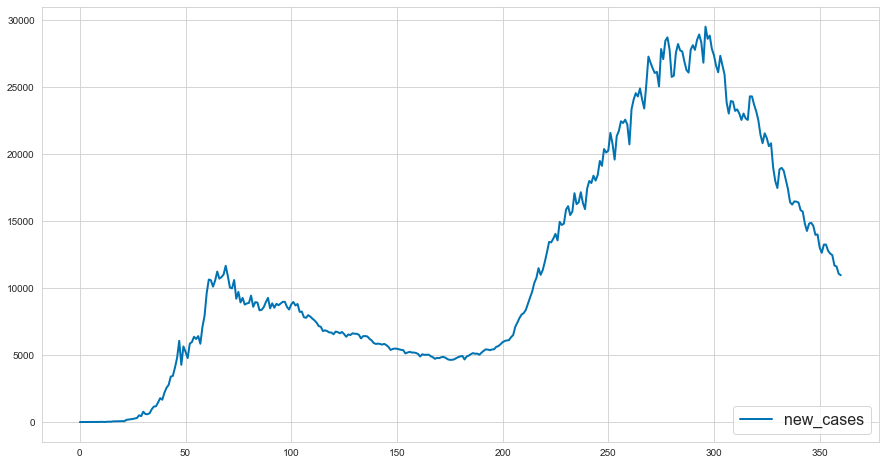

In [9]:
xs = np.arange(0, data_rus.shape[0], 1)
ys = np.array(data_rus['new_cases'])

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys, linewidth=2, label="new_cases")
ax.legend(loc="lower right", fontsize=legend_fontsize)
plt.show()

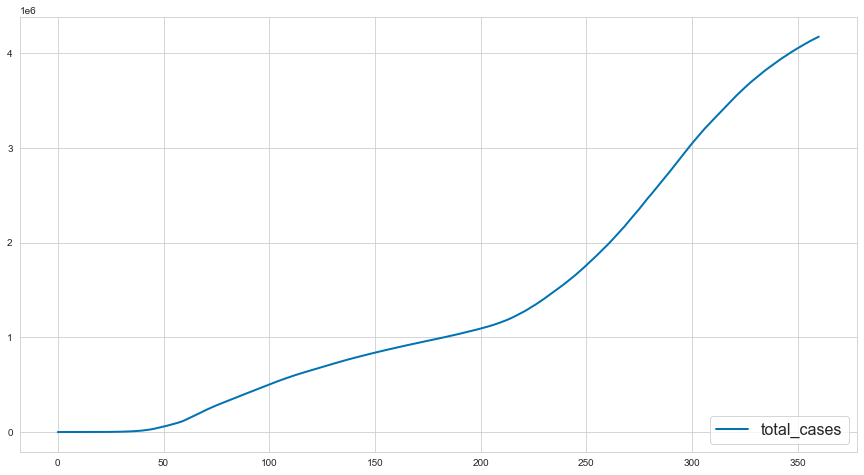

In [10]:
xs = np.arange(0, data_rus.shape[0], 1)
ys = np.array(data_rus['total_cases'])

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys, linewidth=2, label="total_cases")
ax.legend(loc="lower right", fontsize=legend_fontsize)
plt.show()

<h5>Задание 2a</h5>

График похож на экспоненту, поэтому попробуем подогнать экспоненциальную модель роста числа заболевших $TotalCases  \sim e^{ax + b}$, где x - номер текущего дня. Для этого обучим линейную модель вида $ln (TotalCases) = ax + b + \epsilon$ по данным за первые 50 дней и параллельно оценим дисперсию остатков(квадрат сигмы равен дисперсии). Здесь предполагаем, что $\epsilon$ имеет нормальное распределение с 0 средним и дисперсией $\sigma^2$: 

In [11]:
N = 50
xs = np.arange(0, N, 1)
ys = np.array(data_rus['total_cases'].iloc[:N])
mdl = linear_model.LinearRegression().fit(xs.reshape(-1, 1), np.log(ys).reshape(-1, 1))
a = mdl.coef_[0][0]
b = mdl.intercept_[0]
print("Coef: %.4f," % mdl.coef_[0][0], "Intercept: %.4f" % mdl.intercept_[0])
y_pred = np.exp(mdl.predict(xs.reshape(-1,1)))
residuals = np.log(ys) - np.array([x[0] for x in mdl.predict(xs.reshape(-1, 1))])
sigma_noise = np.std(residuals)
print("Sigma: %.4f" % sigma_noise)

Coef: 0.1983, Intercept: 1.8207
Sigma: 0.3490


<h5>Задание 2b</h5>

Далее найдем апостериорное распределение параметров модели, выбрав в качестве априорного распределения двумерное нормальное с нулевым вектором средних и диагональной ковариационной матрицей (на диагонали возьмем значения, равные 2). Для этого, добавляя по одной точке из тренировочных данных, последовательно будем вычислять параметры промежуточного апостериорного распределения. Таким образом, после $k$ итераций мы будем получать апостериорное распределение, если бы у нас было ровно $k$ рассмотренных точек тренировочных данных. 

In [12]:
#для Heat map
K = 250
X = np.linspace(-2, 2, K)
Y = np.linspace(-2, 2, K)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def myplot_heatmap(Z):
    plt.axis('equal')
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)

Так выглядит априорное распределение

<ipython-input-12-9bd497837568>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)


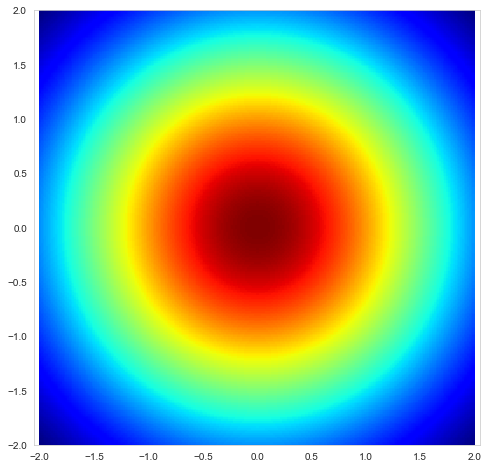

In [13]:
cur_mu, cur_sigma = np.array([0, 0]), 2*np.array([[1, 0], [0, 1]])

Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
myplot_heatmap(Z)

In [14]:
def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

А вот так апостериорное и его параметры

<ipython-input-15-0c73063a5c8b>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)


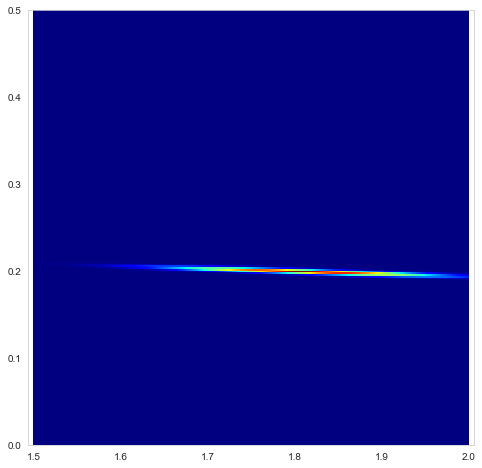

In [15]:
for i in range(50):
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, i, np.log(ys[i]), sigma_noise)
    
K = 250
X = np.linspace(1.5, 2, K)
Y = np.linspace(0, 0.5, K)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def myplot_heatmap(Z):
    plt.axis('equal')
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    
Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
myplot_heatmap(Z)

In [16]:
cur_mu, cur_sigma

(array([1.81219413, 0.19854949]),
 array([[ 9.41520326e-03, -2.85308760e-04],
        [-2.85308760e-04,  1.16594430e-05]]))

<h5>Задание 2с</h5>

Посэмплируем значения из апостериорного распределения и построим различные эскпоненты по этим параметрами. Также на графике покажем реальную картину и обученную ранее модель с помощью линейной регресии.

In [17]:
def myplot_sample_lines(mu, sigma, n=20, days = 50):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    plt.plot(xs[:days], np.exp(my_w[0][0] + my_w[0][1]*xs)[:days], lw=.6, color = 'black', label="sample_exp")
    for w in my_w[1:]:
        plt.plot(xs[:days], np.exp(w[0] + w[1]*xs)[:days], lw=.6, color = 'black')

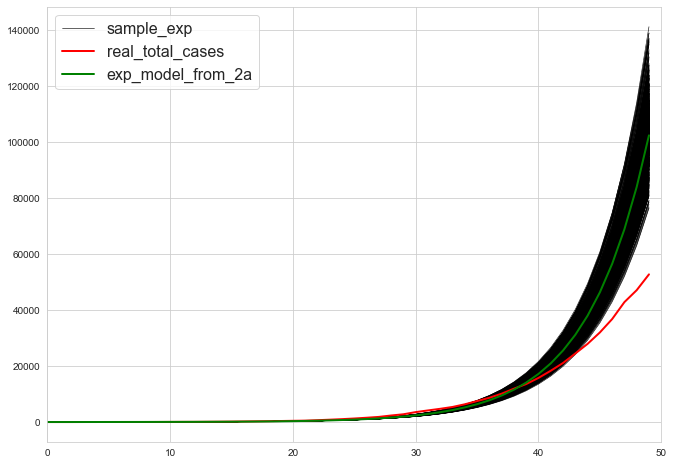

In [18]:
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111)
ax.set_xlim((0, 50))
myplot_sample_lines(cur_mu, cur_sigma, 2000)
plt.plot(xs, ys, lw=2, color = 'red', label = 'real_total_cases')
plt.plot(xs, y_pred, lw=2, color = 'green', label = 'exp_model_from_2a')
ax.legend(loc="upper left", fontsize=legend_fontsize)

Видно, что пучок экспонент уже к концу тренировочных данных проходит заметно выше реальной картины и становится понятно, что дальнейший рост будет колоссальным. Убедимся в этом и построим распределения.

In [19]:
xs = np.arange(0, data_rus.shape[0], 1)

may_prediction = []
june_prediction = []
september_prediction = []

diff_may = int(str(date(2020, 5, 1) - date(2020, 3, 3)).split()[0])
diff_june = int(str(date(2020, 6, 1) - date(2020, 3, 3)).split()[0])
diff_september = int(str(date(2020, 9, 1) - date(2020, 3, 3)).split()[0])

my_w = np.random.multivariate_normal(cur_mu, cur_sigma, 20000)
for w in my_w:
    may_prediction.append(np.exp(w[0] + w[1]*xs[diff_may]))
    june_prediction.append(np.exp(w[0] + w[1]*xs[diff_june]))
    september_prediction.append(np.exp(w[0] + w[1]*xs[diff_september]))
print("Ожидаемое число заболевших")
print("May, 1st: %d" % np.mean(np.array(may_prediction)))
print("June, 1st: %d" % np.mean(np.array(june_prediction)))
print("September, 1st: %d\n" % np.mean(np.array(september_prediction)))
print("С вероятностью 0.95 заболевших будет не больше")
print("May, 1st: %d" % np.array(sorted(may_prediction))[19000])
print("June, 1st: %d" % np.array(sorted(june_prediction))[19000])
print("September, 1st: %d\n" % np.array(sorted(september_prediction))[19000])
print("С вероятностью 0.05 заболевших будет не больше")
print("May, 1st: %d" % np.array(sorted(may_prediction))[1000])
print("June, 1st: %d" % np.array(sorted(june_prediction))[1000])
print("September, 1st: %d" % np.array(sorted(september_prediction))[1000])

Ожидаемое число заболевших
May, 1st: 754984
June, 1st: 361960852
September, 1st: 34866946547317972

С вероятностью 0.95 заболевших будет не больше
May, 1st: 922179
June, 1st: 511065424
September, 1st: 72620458603957552

С вероятностью 0.05 заболевших будет не больше
May, 1st: 607153
June, 1st: 242305564
September, 1st: 12487703107747966


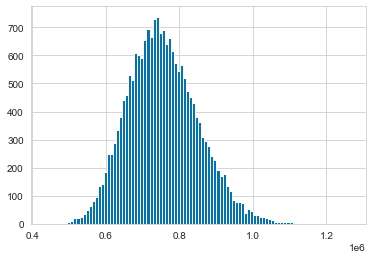

In [20]:
may_hist = plt.hist(may_prediction, bins = 100 )

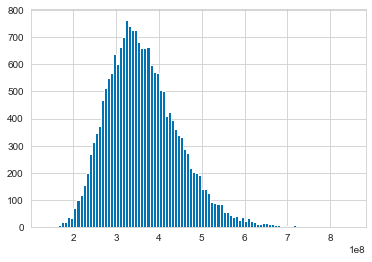

In [21]:
june_hist = plt.hist(june_prediction, bins = 100 )

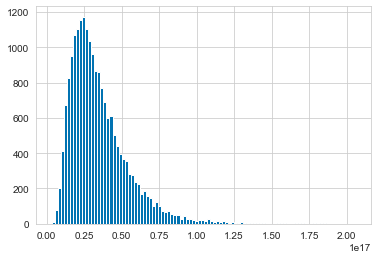

In [22]:
september_hist = plt.hist(september_prediction, bins = 100 )

Результаты, как и ожидалось, получились слишком пессимистичными и уже даже первоиюньские данные превышают численность России. Что касается сентября, то в целом мире столько людей не живет...

<h5>Задание 3а</h5>

Попробуем рассмотреть другую модель, более приближенную к реальной жизни. Для этого вместо экспонент будем рассматривать сигмоидальные функции.

Запишем общий вид такой функции: 

$TotalCases(x) = \Phi(x) = \int_{-\infty}^{x}e^{at^2 + bt + c}dt$, где $x$ - номер текущего дня

Возьмем производную по $x$ от левой и правой части. Тогда справа пропадет интеграл, а слева, вспомнив определение разностной производной, получим ежедневный прирост заболеваний, то есть уже известный нам столбец NewCases:

$TotalCases'(x) = NewCases(x) = e^{ax^2 + bx + c}$

Далее, взяв логарифм от обеих частей, получим линейную модель с двумя предикторами: номер текущего дня и квадрат номера текущего дня: $ln(NewCases) = ax^2 + bx + c + \epsilon$, где $\epsilon$ имеет нормальное распределение с нулевым средним и неоторой дисперсией $\sigma^2$

In [23]:
N = 50
xs = np.arange(0, N, 1)
xs2 = xs ** 2
X = np.vstack((xs, xs2)).T
ys = np.array(data_rus['new_cases'].iloc[:N])
mdl = linear_model.LinearRegression().fit(X, np.log(ys).reshape(-1, 1))
a = mdl.coef_[0][0]
b = mdl.intercept_[0]
print("Coef_1: %.4f," % mdl.coef_[0][0], "Coef_2: %.4f," % mdl.coef_[0][1], "Intercept: %.4f" % mdl.intercept_[0])
y_pred = np.exp(mdl.predict(X))
residuals = np.log(ys) - np.array([x[0] for x in mdl.predict(X)])
sigma_noise = np.std(residuals)
print("Sigma: %.4f" % sigma_noise)

Coef_1: 0.2756, Coef_2: -0.0018, Intercept: -0.3966
Sigma: 0.4892


<h5>Задание 3b</h5>

В качестве априорного распределения весов возьмем опять же многомерное нормальное с вектором нулевых средних и диагональной матрицей ковриации(на диагонали все те же 2), но в этот раз уже трехмерное.

In [24]:
cur_mu, cur_sigma = np.array([0, 0, 0]), 2 * np.eye(3)

Немного изменим функцию обновления весов, так как весов теперь три, а не 2 и посчитаем с помощью нее параметры апостериорного распредления. Получим следующие результаты:

In [25]:
def bayesian_update2(mu, sigma, x, x2, y, sigma_noise=.25):
    x_matrix = np.array([[1, x, x2]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

In [26]:
for i in range(50):
    cur_mu, cur_sigma = bayesian_update2(cur_mu, cur_sigma, i, i ** 2, np.log(ys[i]), sigma_noise)

In [27]:
cur_mu, cur_sigma

(array([-0.3884184 ,  0.27494955, -0.00181835]),
 array([[ 3.90201341e-02, -3.15245662e-03,  5.30704019e-05],
        [-3.15245662e-03,  3.49440919e-04, -6.68064624e-06],
        [ 5.30704019e-05, -6.68064624e-06,  1.36646185e-07]]))

<h5>Задание 3с</h5>

Посэмплируем аналогично значения из апостериорного распределения и построим соответствующие сигмоиды по этим параметрами. Также на графике покажем реальную картину и обученную ранее сигмоидальную модель с помощью линейной регресии.

In [28]:
xs = np.arange(0, data_rus.shape[0], 1)
ys = np.array(data_rus['total_cases'])
xs2 = xs ** 2
X = np.vstack((xs, xs2)).T
y_pred = np.cumsum(np.exp(mdl.predict(X)))

def myplot_sample_lines(mu, sigma, n=20, days = 50):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    plt.plot(xs[:days], np.cumsum(np.exp(my_w[0][0] + my_w[0][1]*xs + my_w[0][2]*(xs2)))[:days], lw=.6, color = 'black', label="sample_sigmoid")
    for w in my_w[1:]:
        plt.plot(xs[:days], np.cumsum(np.exp(w[0] + w[1]*xs + w[2]*xs2))[:days], lw=.6, color = 'black')

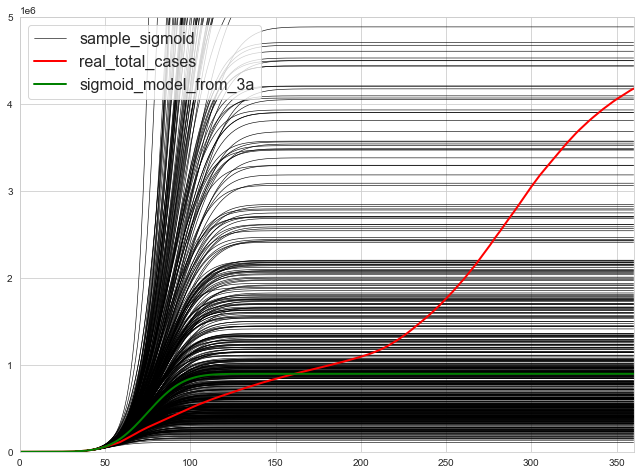

In [29]:
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111)
ax.set_xlim((0, 360))
ax.set_ylim((0, 5 * 10**6))
myplot_sample_lines(cur_mu, cur_sigma, n = 500, days = len(xs))
plt.plot(xs, ys, lw=2, color = 'red', label = 'real_total_cases')
plt.plot(xs, y_pred, lw=2, color = 'green', label = 'sigmoid_model_from_3a')
ax.legend(loc="upper left", fontsize=legend_fontsize)

Посчитаем статистики по смоделированным данным в оптимистичном и пессимистичном сценариях, а также посмотрим на реальное число заболевших, которое наблюдалось в России на эти даты

In [30]:
xs = np.arange(0, data_rus.shape[0], 1)
xs2 = xs ** 2

may_prediction = []
june_prediction = []
september_prediction = []
today_prediction = []

diff_may = int(str(date(2020, 5, 1) - date(2020, 3, 3)).split()[0])
diff_june = int(str(date(2020, 6, 1) - date(2020, 3, 3)).split()[0])
diff_september = int(str(date(2020, 9, 1) - date(2020, 3, 3)).split()[0])
diff_today = int(str(date(2021, 2, 24) - date(2020, 3, 3)).split()[0])

my_w = np.random.multivariate_normal(cur_mu, cur_sigma, 20000)
for w in my_w:
    may_prediction.append(np.cumsum(np.exp(w[0] + w[1]*xs + w[2] * xs2))[diff_may])
    june_prediction.append(np.cumsum(np.exp(w[0] + w[1]*xs + w[2] * xs2))[diff_june])
    september_prediction.append(np.cumsum(np.exp(w[0] + w[1]*xs + w[2] * xs2))[diff_september])
    today_prediction.append(np.cumsum(np.exp(w[0] + w[1]*xs + w[2] * xs2))[diff_today])
    
print("Реальное число заболевших")
print("May, 1st: %d" % ys[diff_may])
print("June, 1st: %d" % ys[diff_june])
print("September, 1st: %d" % ys[diff_september])
print("February 2021, 24th: %d\n" % ys[diff_today])

print("Ожидаемое число заболевших(медиана)")
print("May, 1st: %d" % np.array(sorted(may_prediction))[10000])
print("June, 1st: %d" % np.array(sorted(june_prediction))[10000])
print("September, 1st: %d" % np.array(sorted(september_prediction))[10000])
print("February 2021, 24th: %d\n" % np.array(sorted(today_prediction))[10000])

print("С вероятностью 0.9 заболевших будет не больше")
print("May, 1st: %d" % np.array(sorted(may_prediction))[18000])
print("June, 1st: %d" % np.array(sorted(june_prediction))[18000])
print("September, 1st: %d" % np.array(sorted(september_prediction))[18000])
print("February 2021, 24th: %d\n" % np.array(sorted(today_prediction))[18000])

print("С вероятностью 0.1 заболевших будет не больше")
print("May, 1st: %d" % np.array(sorted(may_prediction))[2000])
print("June, 1st: %d" % np.array(sorted(june_prediction))[2000])
print("September, 1st: %d" % np.array(sorted(september_prediction))[2000])
print("February 2021, 24th: %d" % np.array(sorted(today_prediction))[2000])

Реальное число заболевших
May, 1st: 114431
June, 1st: 414328
September, 1st: 997072
February 2021, 24th: 4153735

Ожидаемое число заболевших(медиана)
May, 1st: 151840
June, 1st: 736704
September, 1st: 899362
February 2021, 24th: 899362

С вероятностью 0.9 заболевших будет не больше
May, 1st: 210471
June, 1st: 2333370
September, 1st: 5269121
February 2021, 24th: 5269131

С вероятностью 0.1 заболевших будет не больше
May, 1st: 112443
June, 1st: 308414
September, 1st: 322238
February 2021, 24th: 322238


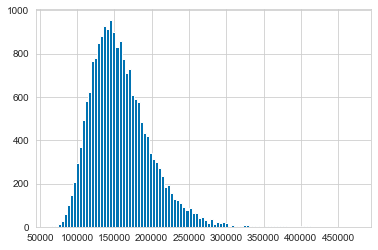

In [31]:
may_hist = plt.hist(may_prediction, bins = 100)

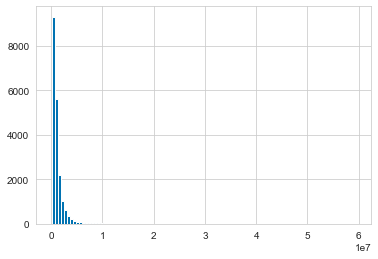

In [32]:
june_hist = plt.hist(june_prediction, bins = 100)

Полученные результаты уже вписываются в картину мира и выглядят довольно правдобно. Однако можно заметить, что ожидаемое число заболевших к сентябрю 2020 года уже достигло пика, что оказалось не таким оптимистичным сценарием. Число заболевших до сих пор растет. К счастью, реальная картина мира не хуже 90 перцентиля)

<h4>...Мысли...</h4>

Упражнение было полезным и наглядно показывает, что первые мысли о реальной картине не всегда оказываются верными и что стоит всегда проверять адекватность получаемых результатов. А еще стало понятно, что даже поведение неизвестного науке зверя можно моделировать и получать крутые результаты, даже если данных про него маловато) 

Очевидно, что заболеваемость коронавирусом неизбежна и локализовать его в современных реалиях не представлялось возможным, хотя и тщетные попытки были сделаны. Самое основное, что стоит избегать властям - резкого увеличения заболеваемости, так как оно неизбежно приведет к высокой смертности, коллапсу в мед учреждениях и недовольству, или даже панике горожан, чего любому здраво мыслящему правительству хочется избежать. Карантин - одна из таких мер, которая снижает количество возможных контактов и скорость распространения болезни, что позволяет растянуть во времени резкий подъем числа заболевших. А выигранное время дает возможность отсрочить неизбежный рост, построить новые госпитали, провести исследования и начать разработку вакцины и лекарства. Поэтому карантин - необходимая мера, которую, как мне кажется, лучше вводить. И полученные данные это подтверждают. Российским властям удалось снизить число заболеваний по сравнению с ожидаемым в первые месяцы распространения коронавируса.

Ясное дело, что карантин также вызывает недовольство горожан, поэтому хотелось бы сократить его длительность и не вводить его раньше времени. Для того, чтобы понять тонкий момент "когда еще рано, а когда уже поздно", нужно смотреть на реальное число заболевших, на количество мед персонала и на возможности государства по реализации мер по сдерживанию роста заболеваемости. Строить таким же образом модели и вычислять заблаговременно дни, когда число заболевших будет резко расти и власти перестанут справляться и соответсвенно вводить ограничительные меры заранее, чтобы выиграть время